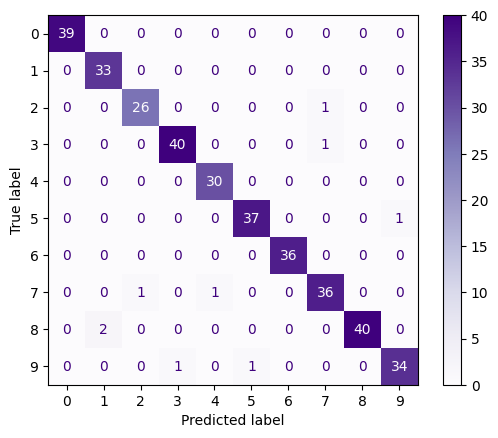

best svm parameters: {'C': 1, 'kernel': 'rbf'}
best rf parameters: {'n_estimators': 100}
best knn parameters: {'n_neighbors': 5}
voting clsf accuracy: 0.975


In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

digits = load_digits()

from sklearn.datasets import load_digits
digits = load_digits()

# # # print(type(digits))  -> <class 'sklearn.utils._bunch.Bunch'>
# # # print(type(digits.data))  -> <class 'numpy.ndarray'>



x, y = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


pca = PCA(n_components=0.95)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


svm_parameters = {"C":[0.1,1,10], "kernel": ["linear","rbf"]}
svm = SVC()
svm_grid = GridSearchCV(svm,svm_parameters,cv=5)
svm_grid.fit(x_train_pca,y_train)


rf_parameters = {"n_estimators": [50, 100, 200]}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf,rf_parameters,cv=5)
rf_grid.fit(x_train_pca,y_train)



knn_parameters = {"n_neighbors": [3,5,7]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,knn_parameters,cv=5)
knn_grid.fit(x_train_pca,y_train)

best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_


voting_cls= VotingClassifier(estimators=[("svm",best_svm),("rf",best_rf),("knn",best_knn)], voting="hard")
## learn differance betwen hard & soft voting
voting_cls.fit(x_train_pca,y_train)
y_pred =voting_cls.predict(x_test_pca)


cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Purples)
plt.show()

print(f"best svm parameters: {svm_grid.best_params_}")
print(f"best rf parameters: {rf_grid.best_params_}")
print(f"best knn parameters: {knn_grid.best_params_}")
print(f"voting clsf accuracy: {voting_cls.score(x_test_pca,y_test)}")
"""
best svm parameters: {'C': 1, 'kernel': 'rbf'}
best rf parameters: {'n_estimators': 100}
best knn parameters: {'n_neighbors': 5}
voting clsf accuracy: 0.975
"""

- In this project, I'd first like to discuss StandardScaler() in more detail. The data is transformed so that its mean is 0 and its standard deviation is 1. The fit method calculates statistics such as the data's mean and standard deviation, and the scaler transform method uses the fitted scaler information. So, the fit must be performed first. standardization is necessary for PCA.
# PCA:
 >PCA is a method when used to reduce high-dimensional data to lower dimensions simplifies high-variance data to obtain the most accurate results.                                                                
 >n_components=0.95 -> product n_components with save  %95 of the variance
# digits dataset:
> A dataset that includes 1797 number, 64 atributes from sklearn to try out ml algorithms. The elements are handwritten numbers of different people.
# GridSearchCV
>Hyperparameter tuning is the process of selecting the optimal values for a machine learning model's hyperparameters. Different models have  different hyperparameters and they need to be tuned accordingly.        >GridSearchCV is a technique for hyperparameter tuning.
İt train the model for every combination in the grid,
evaluate each model using cross-validation,
select the combination that gives the highest score.
# SVM (Support Vector Machine):
>SVM is a supervised learning algorithm used for classification and regression tasks. It tries to find the optimal decision boundary that separates classes with the maximum margin. The kernel parameter defines how the decision boundary is calculated:

- linear creates a straight line or hyperplane.

- rbf (radial basis function) can create non-linear boundaries to separate more complex data patterns.

# Random Forest:
>Random Forest is an ensemble learning algorithm that combines multiple decision trees. Each tree is trained on a random subset of the data and features. The final prediction is made by majority vote. It reduces overfitting compared to a single decision tree and often provides high accuracy.

#KNN (K-Nearest Neighbors):
>KNN is a simple classification algorithm that predicts the label of a data point by looking at the labels of its k nearest neighbors in the training data. The choice of k is important: small k can lead to noisy predictions, while large k can make the model less sensitive to patterns.

# Voting Classifier:
>A Voting Classifier is an ensemble model that combines predictions from multiple different models.

- In hard voting, the final prediction is the class that gets the most votes.

- In soft voting, the predicted probabilities from all models are averaged, and the class with the highest probability is chosen.

# Confusion Matrix:
>A confusion matrix is a table used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions for each class. It is especially useful for identifying which classes the model struggles to classify correctly.

In [17]:
%cd /content/drive/MyDrive/ml-practice-notebooks

/content/drive/MyDrive/ml-practice-notebooks
